In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
data.total_rooms.max()

39320.0

In [4]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(),inplace=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


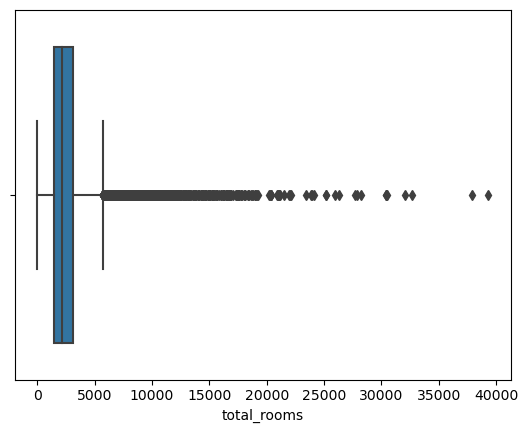

In [6]:
sns.boxplot(data['total_rooms'])
plt.show()

In [7]:
data.total_rooms.describe()

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

In [8]:
mask = (data['total_rooms'] <=3148) & (data['total_rooms'] >= 1447)
mask.value_counts()
# filtered_data['total_rooms'].value_counts()


True     10330
False    10310
Name: total_rooms, dtype: int64

In [9]:
print((data['total_rooms'] >3148).value_counts())
print((data['total_rooms'] <1447).value_counts())

False    15483
True      5157
Name: total_rooms, dtype: int64
False    15487
True      5153
Name: total_rooms, dtype: int64


In [10]:
print(data.total_rooms.max())
print(data.total_rooms.min())
print(data.total_rooms.mean())
print(data.total_rooms.median())
print(data.total_rooms.count())
print(data.total_rooms.std())

39320.0
2.0
2635.7630813953488
2127.0
20640
2181.615251582787


In [11]:
data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [12]:
dummy=pd.get_dummies(data['ocean_proximity'],drop_first=True)
dummy

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
20635,1,0,0,0
20636,1,0,0,0
20637,1,0,0,0
20638,1,0,0,0


In [13]:
data=pd.concat([data,dummy],axis=1)
data=data.drop(['ocean_proximity'],axis=1)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [14]:
x=data.drop(['median_house_value'],axis=1)
x=pd.DataFrame(x)
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1,0,0,0


In [15]:
y=data['median_house_value']
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

## spliting

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# linear regression

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [19]:
lr.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred=lr.predict(x_test)
y_pred

array([ 65435.75052487, 133815.59213185, 263463.62941829, ...,
       283840.43397146, 113960.40616154, 219047.40125169])

In [21]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.6395785380523775

# KNN

In [22]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [23]:
y_pred=knr.predict(x_test)
y_pred

array([140380. , 164120. , 369340.4, ..., 114680. , 165700. , 202980. ])

In [24]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 78193.90729974161
MSE: 10190969277.746487
RMSE: 100950.33074609755


In [25]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.22356892432640918

## Decision tree

In [26]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(random_state=42)

In [27]:
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [28]:
y_pred=tree_reg.predict(x_test)
y_pred

array([ 42500.,  26600., 500001., ..., 430900., 174400., 193800.])

In [29]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.6444540866201292

## SVM

In [30]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [31]:
y_pred=svr.predict(x_test)
y_pred

array([ 84640.07757372, 200874.98733346, 386560.37833721, ...,
       198533.1153546 , 140784.03275966, 157855.76786973])

In [32]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.31389771708274117

## Random forest

In [18]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100)
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [19]:
y_pred=rfr.predict(x_test)
y_pred

array([ 54924.  ,  71865.  , 466709.48, ..., 286873.01, 147257.  ,
       226392.  ])

In [20]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.8186615077886341

In [21]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 31868.855805878553
MSE: 2380140441.1790953
RMSE: 48786.68303112126


In [22]:
import joblib

In [38]:
joblib.dump(rfr,'y_pred.pkl')

['y_pred.pkl']

In [23]:
model=joblib.load('y_pred.pkl')
model.predict(x_test)

array([ 55261. ,  68883. , 468077.6, ..., 255238. , 155358. , 224754. ])

## streamlit

In [40]:
# !pip install streamlit

In [41]:
# !pip install yfinance

In [42]:
# import streamlit as st
# import numpy as np
# import pandas as pd
# import joblib
# import warnings
# warnings
# joblib.dump(rfr,'y_pred.pkl')
# # Load the trained machine learning model
# model = joblib.load('y_pred.pkl')

# # Streamlit app title and description
# st.title('House Price Prediction App')
# st.write('This app predicts house prices based on input features.')

# # User input for feature values
# st.sidebar.header('Input Features')
# # Example input fields, you should customize these based on your features
# input_features = {
#     'Feature 1': st.sidebar.slider('Feature 1', min_value=0, max_value=100, value=50),
#     'Feature 2': st.sidebar.slider('Feature 2', min_value=0, max_value=100, value=50),
#     'Feature 3': st.sidebar.slider('Feature 3', min_value=0, max_value=100, value=50),
#     # Add more feature sliders as needed
# }

# # Create a DataFrame from the input data
# input_df = pd.DataFrame([input_features])

# # Display the input data
# st.subheader('Input Data')
# st.write(input_df)

# # Make predictions using the loaded model
# predicted_prices = model.predict(input_df)

# # Display the predicted prices
# st.subheader('Predicted Prices')
# st.write(predicted_prices)

# # Optional: Display additional insights or visualizations
# # You can add charts, graphs, or any other visualizations here based on your data and use case

# # Note: You might want to handle exceptions, input validation, and other edge cases as needed

# # Run the Streamlit app
# if __name__ == '__main__':
#     st.set_page_config(page_title='House Price Prediction App', page_icon=':house:')
#     st.sidebar.title('Navigation')
#     app_mode = st.sidebar.selectbox('Choose the app mode', ['App', 'About'])

#     if app_mode == 'App':
#         run_app()
#     else:
#         st.sidebar.subheader('About')
#         st.sidebar.text('This app demonstrates a simple machine learning prediction.')

# def run_app():
#     # Your app code here

# # Run the Streamlit app
# if __name__ == '__main__':
#     run_app()


In [43]:
import streamlit as st
import numpy as np
import pandas as pd
import joblib
joblib.dump(rfr,'y_pred.pkl')
def run_app():
    # Load the trained machine learning model
    model = joblib.load('y_pred.pkl')

    # Streamlit app title and description
    st.title('House Price Prediction App')
    st.write('This app predicts house prices based on input features.')

#     # User input for feature values
#     st.sidebar.header('Input Features')
#     # Example input fields, you should customize these based on your features
#     input_features = {
#         'Feature 1': st.sidebar.slider('Feature 1', min_value=0, max_value=100, value=50),
#         'Feature 2': st.sidebar.slider('Feature 2', min_value=0, max_value=100, value=50),
#         'Feature 3': st.sidebar.slider('Feature 3', min_value=0, max_value=100, value=50),
#         # Add more feature sliders as needed
#     }

    # User input for feature values
    st.sidebar.header('Input Features')
    # Example input fields, you should customize these based on your features
    input_features = {
        'INLAND': st.sidebar.slider('INLAND', min_value=0, max_value=100, value=50),
        'ISLAND': st.sidebar.slider('ISLAND', min_value=0, max_value=100, value=50),
        'NEAR BAY': st.sidebar.slider('NEAR BAY', min_value=0, max_value=100, value=50),
        'NEAR OCEAN': st.sidebar.slider('NEAR OCEAN', min_value=0, max_value=100, value=50),
        'households': st.sidebar.slider('households', min_value=0, max_value=1000, value=500),

       
        # Add more feature sliders as needed
}
    
    
    
    # Create a DataFrame from the input data
    input_df = pd.DataFrame([input_features])

    # Display the input data
    st.subheader('Input Data')
    st.write(input_df)

    # Make predictions using the loaded model
    predicted_prices = model.predict(input_df)

    # Display the predicted prices
    st.subheader('Predicted Prices')
    st.write(predicted_prices)

# Run the Streamlit app
if __name__ == '__main__':
    st.set_page_config(page_title='House Price Prediction App', page_icon=':house:')
    st.sidebar.title('Navigation')
    app_mode = st.sidebar.selectbox('Choose the app mode', ['App', 'About'])

    if app_mode == 'App':
        run_app()
    else:
        st.sidebar.subheader('About')
        st.sidebar.text('This app demonstrates a simple machine learning prediction.')


2023-09-08 19:50:10.945 
  command:

    streamlit run C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- housing_median_age
- latitude
- longitude
- median_income
- population
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 5 features, but RandomForestRegressor is expecting 12 features as input.

In [ ]:
# import streamlit as st
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor

# # Load data
# data = pd.read_csv('housing.csv')

# # Split data into features and target
# X = data.drop('median_house_value', axis=1)
# y = data['median_house_value']

# # Train a model
# model = RandomForestRegressor()
# model.fit(X, y)

# # Create Streamlit app
# st.title('Housing Price Predictor')

# # Create input fields for each feature
# inputs = {}
# for col in x_test.columns:
#     inputs[col] = st.number_input(f'Enter value for {col}')

# # Make prediction and display result
# prediction = model.predict(pd.DataFrame([inputs]))[0]
# st.write(f'Predicted house value: ${prediction:,.2f}')


In [ ]:
#!streamlit run app.py

In [ ]:
!streamlit run house.py

In [ ]:
x_test.columns

In [ ]:
x_test.median_income.min()

In [ ]:
x_test.median_income.max()